<a href="https://colab.research.google.com/github/Saravanakumar2005/Cognorise-Infotech/blob/main/Movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
movie_df = pd.read_csv('movie', usecols=['movieId','title'])
rating_df = pd.read_csv('rating', usecols=['userId','movieId','rating'])

In [ ]:
movie_merge = pd.merge(rating_df, movie_df, on='movieId')

In [ ]:
combine_movie = movie_merge.dropna(axis=0,subset=['title'])
movie_rating = (combine_movie.
    groupby(by =['title'])['rating'].
    count().
    reset_index().
    rename(columns={'rating':'totalRatingCount'})
    [['title','totalRatingCount']]
    )

In [ ]:
rating = combine_movie.merge(movie_rating,left_on='title',right_on='title',how = 'left')

<Axes: >

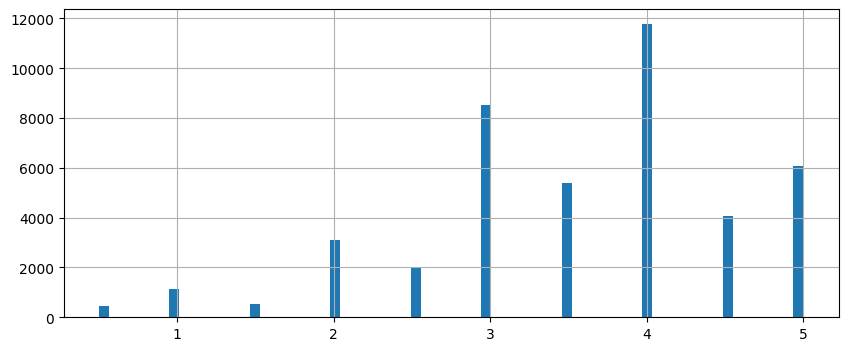

In [ ]:
plt.figure(figsize=(10,4))
rating['rating'].hist(bins = 70)

In [ ]:
threshold = 50
rating_popular = rating.query('totalRatingCount >= @threshold')

In [ ]:
movie_features_df  = rating_popular.pivot_table(index='title',columns='userId',values='rating').fillna(0)

In [ ]:
movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [ ]:
model_knn = NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
shape = movie_features_df.shape


In [ ]:
query_index = np.random.choice(movie_features_df.shape[0])

In [ ]:
distance,indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

In [ ]:
for i in range(0, len(distance.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1},with distance of {2}:'.format(i,movie_features_df.index[indices.flatten()[i]],distance.flatten()))



Recommendations for Léon: The Professional (a.k.a. The Professional) (Léon) (1994):

1: Reservoir Dogs (1992),with distance of [1.11022302e-16 4.44543647e-01 4.78767363e-01 4.80005317e-01
 4.83797517e-01 4.96027138e-01]:
2: Pulp Fiction (1994),with distance of [1.11022302e-16 4.44543647e-01 4.78767363e-01 4.80005317e-01
 4.83797517e-01 4.96027138e-01]:
3: Seven (a.k.a. Se7en) (1995),with distance of [1.11022302e-16 4.44543647e-01 4.78767363e-01 4.80005317e-01
 4.83797517e-01 4.96027138e-01]:
4: Matrix, The (1999),with distance of [1.11022302e-16 4.44543647e-01 4.78767363e-01 4.80005317e-01
 4.83797517e-01 4.96027138e-01]:
5: Eternal Sunshine of the Spotless Mind (2004),with distance of [1.11022302e-16 4.44543647e-01 4.78767363e-01 4.80005317e-01
 4.83797517e-01 4.96027138e-01]:
